## Copenhagen Airbnb listings 2023

**This program reads and explores raw data about the Airbnb listings from Copenhagen 2023**

![Airbnb](airbnb.png)

**Here is the flow of the current program:**

- Read raw data file
- Initial exploration of the data (size, features, missing values etc.)
- Initial comprehensive cleanup and filling of missing data
- Transformation of non numeric values into numeric values
- Further exploration of clean data aswell as visulization
- Feature engineering

### Environment

In [1]:
# data structure
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from packed_bubble_chart import BubbleChart

# unsupervised machine learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

import numpy as np
from sklearn import metrics

### Read data and superficial exploration

**First we'll read the data and get a quick overview**

In [2]:
na_values = ['NaN','Na',' ','N/A']
cph_listings_df = pd.read_csv('cph_listings.csv',na_values=na_values)

In [3]:
cph_listings_df = pd.read_csv('cph_listings.csv', header=0)

In [4]:
cph_area_df = pd.read_excel('cph_area_size.xlsx')
cph_pop_df = pd.read_excel('cph_population.xlsx') 

In [5]:
# view size
cph_listings_df.shape

(18545, 75)

In [6]:
cph_area_df.shape

(5, 11)

In [7]:
cph_pop_df.shape

(5, 14)

In [8]:
# adjust the amount of viewable columns
pd.set_option('display.max_columns', 75)

In [9]:
# peek at data frame
cph_listings_df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,772195193586734462,https://www.airbnb.com/rooms/772195193586734462,20231227173932,2024-01-03,previous scrape,Rental unit in Copenhagen · 1 bedroom · 1 bed ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,139504671,https://www.airbnb.com/users/show/139504671,Alexandra,2017-07-09,"Copenhagen, Denmark",NaN,within an hour,100%,57%,f,https://a0.muscache.com/im/pictures/user/32ecb...,https://a0.muscache.com/im/pictures/user/32ecb...,NaN,2.0,2.0,"['email', 'phone']",t,t,NaN,Indre By,NaN,55.685219,12.565863,Private room in rental unit,Private room,2,NaN,1 shared bath,NaN,1.0,[],NaN,5,12,5,5,12,12,5.0,12.0,NaN,NaN,0,0,0,0,2024-01-03,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,993508926988263521,https://www.airbnb.com/rooms/993508926988263521,20231227173932,2023-12-27,city scrape,Rental unit in Copenhagen · ★4.67 · 1 bedroom ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,540024469,https://www.airbnb.com/users/show/540024469,Marie,2023-10-02,NaN,NaN,within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/0c28f...,https://a0.muscache.com/im/pictures/user/0c28f...,NaN,1.0,1.0,"['email', 'phone']",t,f,NaN,Amager st,NaN,55.653641,12.613375,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,1.0,[],$860.00,2,20,2,7,20,20,2.3,20.0,NaN,t,12,25,25,25,2023-12-27,9,9,3,2023-10-08,2023-12-22,4.67,4.67,4.67,4.78,4.78,4.67,4.67,NaN,f,1,1,0,0,3.33
2,973046361084511805,https://www.airbnb.com/rooms/973046361084511805,20231227173932,2023-12-28,city scrape,Rental unit in Copenhagen · ★4.86 · 1 bedroom ...,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,413314931,https://www.airbnb.com/users/show/413314931,Julie,2021-07-16,"Copenhagen, Denmark",NaN,within a few hours,80%,57%,f,https://a0.muscache.com/im/pictures/user/57556...,https://a0.muscache.com/im/pictures/user/57556...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,Amager Vest,NaN,55.666180,12.578590,Entire rental unit,Entire home/apt,3,NaN,1 bath,NaN,1.0,[],"$1,000.00",2,60,2,2,60,60,2.0,60.0,NaN,t,0,0,20,107,2023-12-28,7,7,3,2023-11-03,2023-12-17,4.86,4.86,4.43,4.71,4.71,5.00,4.43,NaN,f,1,1,0,0,3.75
3,52551491,https://www.airbnb.com/rooms/52551491,20231227173932,2023-12-28,city scrape,Condo in Copenhagen · ★5.0 · 1 bedroom · 1 bed...,NaN,Having won prices for its urban architecture a...,https://a0.muscache.com/pictures/ae4d3db9-9f91...,36416123,https://www.airbnb.com/users/show/36416123,Kasper,2015-06-22,"Copenhagen, Denmark",We are a friendly and outgoing Danish/Brazilia...,within a day,100%,48%,f,https://a0.muscache.com/im/pictures/user/3c864...,https://a0.muscache.com/im/pictures/user/3c864...,NaN,1.0,1.0,"['email', 'phone']",t,t

**After carefully examining our data frame and reviewing the official column descriptions, we have identified 22 columns that we consider both relevant and suitable for addressing our problem statement. These columns will be retained for further analysis.**

In [10]:
cph_area_df

,Arealer (kvm) 2021 efter tid og distrikt,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Enhed: M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Bydel - Indre By,Bydel - Østerbro,Bydel - Nørrebro,Bydel - Vesterbro/Kgs Enghave,Bydel - Valby,Bydel - Vanløse,Bydel - Brønshøj-Husum,Bydel - Bispebjerg,Bydel - Amager Øst,Bydel - Amager Vest
2,2021,9432832,9860777,4104694,8371719,9233781,6698505,8738408,6832786,9784081,19370227
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kilde: Københavns Kommunes egne beregninger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
cph_pop_df

,"Befolkningen efter civilstand, alder, køn, tid og distrikt",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Enhed: Antal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Bydel - Indre By,Bydel - Østerbro,Bydel - Nørrebro,Bydel - Vesterbro/Kongens Enghave,Bydel - Valby,Bydel - Vanløse,Bydel - Brønshøj-Husum,Bydel - Bispebjerg,Bydel - Amager Øst,Bydel - Amager Vest
2,Civilstand i alt,Alder i alt,Køn i alt,2023K4,57153,81326,79318,81143,65933,40776,44457,55044,63068,88306
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kilde: Københavns Kommunes beregninger på bagg...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Initial removal of unnecessary columns

In [12]:
# list of colums to keep
columns_to_keep = [
    'id', 'host_id', 'host_response_rate',
    'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified',
    'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
    'bathrooms_text', 'beds', 'price', 'minimum_nights', 'maximum_nights',
    'availability_365', 'number_of_reviews', 'review_scores_rating',
    'instant_bookable', 'reviews_per_month'
]

# update df
cph_listings_df = cph_listings_df[columns_to_keep]

# peek at df
cph_listings_df

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
0,772195193586734462,139504671,100%,57%,f,2.0,t,t,Indre By,Private room in rental unit,Private room,2,1 shared bath,1.0,NaN,5,12,0,0,NaN,f,NaN
1,993508926988263521,540024469,100%,100%,f,1.0,t,f,Amager st,Entire rental unit,Entire home/apt,2,1 bath,1.0,$860.00,2,20,25,9,4.67,f,3.33
2,973046361084511805,413314931,80%,57%,f,1.0,t,t,Amager Vest,Entire rental unit,Entire home/apt,3,1 bath,1.0,"$1,000.00",2,60,107,7,4.86,f,3.75
3,52551491,36416123,100%,48%,f,1.0,t,t,Vesterbro-Kongens Enghave,Entire condo,Entire home/apt,2,1 bath,1.0,"$1,200.00",2,7,178,16,5.00,f,0.59
4,723099448414722172,5049349,100%,79%,t,3.0,t,t,Vesterbro-Kongens Enghave,Entire condo,Entire home/apt,5,1 bath,3.0,"$1,400.00",2,30,118,16,4.94,f,1.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18540,899314240743700953,516545031,100%,92%,f,1.0,f,t,Vesterbro-Kongens Enghave,Entire rental unit,Entire home/apt,2,1 bath,1.0,NaN,2,7,0,6,4.83,t,0.93
18541,894209151571063412,87341967,100%,100%,t,1.0,t,t,Frederiksberg,Entire rental unit,Entire home/apt,2,1 bath,1.0,NaN,1,365,0,11,4.82,t,1.53
18542,882414557986654201,378586472,NaN,33%,f,1.0,t,t,Amager Vest,Entire rental unit,Entire home/apt,6,1 bath,3.0,NaN,3,365,0,0,NaN,f,NaN
18543,50437911,90546144,100%,94%,t,1.0,t,t,Vesterbro-Kongens Enghave,Entire rental unit,Entire home/apt,2,1 bath,1.0,"$1,873.00",4,60,222,27,4.96,f,0.91


### Data cleaning 

**First we'll deal with the two small data frames**

In [13]:
# drop the first column
cph_area_df = cph_area_df.iloc[:, 1:]

# set row 1 as new column names 
cph_area_df.columns = cph_area_df.iloc[1]

# remove row number from columnname
cph_area_df.columns.name = None

# drop unessersary rows
cph_area_df = cph_area_df.drop([0, 1, 3, 4])

# reset row index
cph_area_df = cph_area_df.reset_index(drop=True)

# only keep area name
cph_area_df.columns = cph_area_df.columns.str.replace('Bydel -', '')

In [14]:
cph_area_df

,Indre By,Østerbro,Nørrebro,Vesterbro/Kgs Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,9432832,9860777,4104694,8371719,9233781,6698505,8738408,6832786,9784081,19370227


In [15]:
# drop the first column
cph_pop_df = cph_pop_df.iloc[:, 4:]

# set row 1 as new column names 
cph_pop_df.columns = cph_pop_df.iloc[1]

# remove row number from columnname
cph_pop_df.columns.name = None

# drop unessersary rows
cph_pop_df = cph_pop_df.drop([0, 1, 3, 4])

# reset row index
cph_pop_df = cph_pop_df.reset_index(drop=True)

# only keep area name
cph_pop_df.columns = cph_pop_df.columns.str.replace('Bydel -', '')

# make sure that the column is spelled the same way as the other df
cph_pop_df.columns = cph_pop_df.columns.str.replace('Vesterbro/Kongens Enghave', 'Vesterbro/Kgs Enghave')

In [16]:
cph_pop_df

,Indre By,Østerbro,Nørrebro,Vesterbro/Kgs Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,57153,81326,79318,81143,65933,40776,44457,55044,63068,88306


In [17]:
# convert area from m² to km²
cph_area_df_km2 = cph_area_df.div(1000000)

# calculate population density (people per km²)
cph_density_df = cph_pop_df.div(cph_area_df_km2)

cph_density_df

,Indre By,Østerbro,Nørrebro,Vesterbro/Kgs Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,6058.94391,8247.423099,19323.730344,9692.513569,7140.411929,6087.328441,5087.539973,8055.864767,6445.980977,4558.852098


In [18]:
# save for later. Needed for visualization.
population_density_data = {
    'Area': ['Indre By', 'Østerbro', 'Nørrebro', 'Vesterbro/Kgs Enghave', 'Valby', 'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Øst', 'Amager Vest'],
    'Population Density': [6058.94, 8247.42, 19323.73, 9692.51, 7140.41, 6087.33, 5087.54, 8055.86, 6445.98, 4558.85]
}

In [19]:
# check the spelling of danish areas
print(cph_listings_df['neighbourhood_cleansed'].unique())

['Indre By' 'Amager st' 'Amager Vest' 'Vesterbro-Kongens Enghave'
 'Nrrebro' 'Frederiksberg' 'Vanlse' 'sterbro' 'Valby' 'Bispebjerg'
 'Brnshj-Husum']


### Now we can move on to start cleaning the big df

**Notice how the names are missing danish letters**

In [20]:
# fix names by mapping 
danish_letters_mapping = {
    'Indre By': 'Indre By',
    'Amager st': 'Amager st',
    'Amager Vest': 'Amager Vest',
    'Vesterbro-Kongens Enghave': 'Vesterbro-Kongens Enghave',
    'Nrrebro': 'Nørrebro',
    'Frederiksberg': 'Frederiksberg',
    'Vanlse': 'Vanløse',
    'sterbro': 'Østerbro',
    'Valby': 'Valby',
    'Bispebjerg': 'Bispebjerg',
    'Brnshj-Husum': 'Brønshøj-Husum'
}

# use mapping on column
cph_listings_df.loc[:, 'neighbourhood_cleansed'] = cph_listings_df['neighbourhood_cleansed'].replace(danish_letters_mapping)

In [21]:
# confirm changes
print(cph_listings_df['neighbourhood_cleansed'].unique())

['Indre By' 'Amager st' 'Amager Vest' 'Vesterbro-Kongens Enghave'
 'Nørrebro' 'Frederiksberg' 'Vanløse' 'Østerbro' 'Valby' 'Bispebjerg'
 'Brønshøj-Husum']


In [22]:
# view columns missing any values
print(cph_listings_df.isnull().sum()[lambda x: x > 0])

host_response_rate           8328
host_acceptance_rate         3159
host_is_superhost              32
host_total_listings_count       1
host_has_profile_pic            1
host_identity_verified          1
bathrooms_text                  5
beds                          276
price                        6349
review_scores_rating         2393
reviews_per_month            2401
dtype: int64


#### Remove columns

In [23]:
# remove columns missing 40% data or more
limit = 40

# find max missing values allowed and drop columns that exceeds the limit
max_missing_values = int((limit / 100) * len(cph_listings_df))
cph_listings_df = cph_listings_df.dropna(axis=1, thresh=len(cph_listings_df) - max_missing_values)

# check
print(cph_listings_df.isnull().sum()[lambda x: x > 0])

host_acceptance_rate         3159
host_is_superhost              32
host_total_listings_count       1
host_has_profile_pic            1
host_identity_verified          1
bathrooms_text                  5
beds                          276
price                        6349
review_scores_rating         2393
reviews_per_month            2401
dtype: int64


#### Remove rows

In [24]:
# list of missing values
columns_with_missing_values = cph_listings_df.columns[cph_listings_df.isnull().sum() > 0].tolist()

# filter list and store rows missing 500 or less values
selected_columns = [col for col in columns_with_missing_values if cph_listings_df[col].isnull().sum() <= 500]

# drop rows missing 500 or less values
cph_listings_df = cph_listings_df.dropna(subset=selected_columns)

In [25]:
# check
cph_listings_df.shape

(18231, 21)

#### Convert to numeric values and fill missing data with average

In [26]:
# view data types
print(cph_listings_df.dtypes)

id                             int64
host_id                        int64
host_acceptance_rate          object
host_is_superhost             object
host_total_listings_count    float64
host_has_profile_pic          object
host_identity_verified        object
neighbourhood_cleansed        object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms_text                object
beds                         float64
price                         object
minimum_nights                 int64
maximum_nights                 int64
availability_365               int64
number_of_reviews              int64
review_scores_rating         float64
instant_bookable              object
reviews_per_month            float64
dtype: object


**The following columns contains non numerical values:**

- instant_bookable = boolean
- host_is_superhost = boolean
- host_has_profile_pic = boolean
- host_identity_verified = boolean
- host_acceptance_rate = text 
- price = text
- neighbourhood_cleansed = text
- property_type = text
- room_type = text
- bathrooms_text = text

**First we'll deal with the text values that have missing values and can easily be changed to numeric values.**

In [27]:
# view missing values
print(cph_listings_df.isnull().sum()[lambda x: x > 0])

host_acceptance_rate    3095
price                   6281
review_scores_rating    2294
reviews_per_month       2302
dtype: int64


In [28]:
# convert 'price' to numeric value
cph_listings_df['price'] = pd.to_numeric(cph_listings_df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# convert 'host_acceptance_rate' to numeric value
cph_listings_df['host_acceptance_rate'] = cph_listings_df['host_acceptance_rate'].replace('%', '', regex=True).astype(float)

# check
print(cph_listings_df[['price', 'host_acceptance_rate']].dtypes)

price                   float64
host_acceptance_rate    float64
dtype: object


In [29]:
# find average for'price', 'host_acceptance_rate', 'review_scores_rating', and 'reviews_per_month'
avg_price = cph_listings_df['price'].mean()
avg_acceptance_rate = cph_listings_df['host_acceptance_rate'].mean()
avg_review_scores_rating = cph_listings_df['review_scores_rating'].mean()
avg_reviews_per_month = cph_listings_df['reviews_per_month'].mean()

# fill missing values with average
cph_listings_df['price'].fillna(avg_price, inplace=True)
cph_listings_df['host_acceptance_rate'].fillna(avg_acceptance_rate, inplace=True)
cph_listings_df['review_scores_rating'].fillna(avg_review_scores_rating, inplace=True)
cph_listings_df['reviews_per_month'].fillna(avg_reviews_per_month, inplace=True)

# check for missing values
print(cph_listings_df.isnull().sum()[lambda x: x > 0])

Series([], dtype: int64)


### Transform Categorical Data into Numeric

**As we continue our processing we'll convert our last boolean and string values into numeric values**

- instant_bookable = boolean
- host_is_superhost = boolean
- host_has_profile_pic = boolean
- host_identity_verified = boolean

- neighbourhood_cleansed = text
- property_type = text
- room_type = text
- bathrooms_text = text


**First we'll deal with the booleans**

In [30]:
# convert booleans to integers
boolean_columns = ['instant_bookable', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']

# map 'f' to 0 and 't' to 1
for column in boolean_columns:
    cph_listings_df[column] = cph_listings_df[column].map({'f': 0, 't': 1})

# check
print(cph_listings_df[boolean_columns].dtypes)

instant_bookable          int64
host_is_superhost         int64
host_has_profile_pic      int64
host_identity_verified    int64
dtype: object


**The text values are a little more iffy. Therefore we'll start by finding all the unique values and establish an overview.**

- neighbourhood_cleansed = text
- property_type = text
- room_type = text = 
- bathrooms_text = text

In [31]:
# list of text valued columns
text_columns = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text']

# loop the columns and view unique values
for column in text_columns:
    unique_values = cph_listings_df[column].unique()
    value_counts = cph_listings_df[column].value_counts()
    
    print(f"\nNumber of unique values:")
    print(value_counts)
    print("\n" + "="*50 + "\n")


Number of unique values:
neighbourhood_cleansed
Vesterbro-Kongens Enghave    3226
Nørrebro                     3199
Indre By                     2649
Østerbro                     1936
Frederiksberg                1902
Amager Vest                  1633
Amager st                    1335
Bispebjerg                    820
Valby                         749
Vanløse                       433
Brønshøj-Husum                349
Name: count, dtype: int64



Number of unique values:
property_type
Entire rental unit                    10001
Entire condo                           4789
Private room in rental unit            1017
Entire home                             838
Private room in condo                   377
Entire townhouse                        358
Entire villa                            179
Entire loft                             126
Private room in home                    113
Entire serviced apartment                99
Private room in villa                    36
Private room in townhouse

**It is apparent that the text values are vast. Here is what we'll do:**

- neighbourhood_cleansed & room_type have a fair amount of unique text values, so we'll map these values to integers straight away. 

- bathrooms_text & property_type has so much info, that we'll drop all values below 500, and then map the remaining values to numeric values.    

**Room type**

In [32]:
# map text values to numeric values
room_type_mapping = {'Entire home/apt': 1, 'Private room': 2, 'Shared room': 3, 'Hotel room': 4}

# apply to column
cph_listings_df['room_type'] = cph_listings_df['room_type'].map(room_type_mapping).astype(int)

**Neighbourhood**

In [33]:
# map text values to numeric values
neighbourhood_mapping = {'Vesterbro-Kongens Enghave': 1, 'Nørrebro': 2, 'Indre By': 3, 'Østerbro': 4,
                         'Frederiksberg': 5, 'Amager Vest': 6, 'Amager st': 7, 'Bispebjerg': 8,
                         'Valby': 9, 'Vanløse': 10, 'Brønshøj-Husum': 11}
# apply to column
cph_listings_df['neighbourhood_cleansed'] = cph_listings_df['neighbourhood_cleansed'].map(neighbourhood_mapping).astype(int)

**Bathrooms**

In [34]:
# count number of each value 
bathroom_counts = cph_listings_df['bathrooms_text'].value_counts()

# find rows with 500 or less values 
mask = cph_listings_df['bathrooms_text'].isin(bathroom_counts.index[bathroom_counts >= 500])

# filter data frame
cph_listings_df = cph_listings_df[mask]

In [35]:
# get an overview of remaining values
print(cph_listings_df['bathrooms_text'].value_counts())

bathrooms_text
1 bath           14389
1.5 baths         1193
1 shared bath     1077
2 baths            956
Name: count, dtype: int64


In [36]:
# map values to numeric
bathroom_mapping = {
    '1 bath': 1,
    '1.5 baths': 1.5,
    '1 shared bath': 0.5,
    '2 baths': 2
}

# map values 
cph_listings_df['bathrooms_text'] = cph_listings_df['bathrooms_text'].map(bathroom_mapping).astype(float)

# rename column
cph_listings_df.rename(columns={'bathrooms_text': 'bathrooms'}, inplace=True)

**Property type**

In [37]:
# count number of each value 
property_counts = cph_listings_df['property_type'].value_counts()

# find rows with 500 or less values 
mask = cph_listings_df['property_type'].isin(property_counts.index[property_counts >= 500])

# filter data frame
cph_listings_df = cph_listings_df[mask]

# get overview
print(cph_listings_df['property_type'].value_counts())

property_type
Entire rental unit             9912
Entire condo                   4757
Private room in rental unit     846
Entire home                     762
Name: count, dtype: int64


In [38]:
# map values to numeric
property_mapping = {
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Private room in rental unit': 3,
    'Entire home': 4
}

# map values 
cph_listings_df['property_type'] = cph_listings_df['property_type'].map(property_mapping).astype(int)

In [39]:
# peak at our current data frame
cph_listings_df

,id,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
0,772195193586734462,139504671,57.0,0,2.0,1,1,3,3,2,2,0.5,1.0,1320.467531,5,12,0,0,4.818525,0,0.733238
1,993508926988263521,540024469,100.0,0,1.0,1,0,7,1,1,2,1.0,1.0,860.000000,2,20,25,9,4.670000,0,3.330000
2,973046361084511805,413314931,57.0,0,1.0,1,1,6,1,1,3,1.0,1.0,1000.000000,2,60,107,7,4.860000,0,3.750000
3,52551491,36416123,48.0,0,1.0,1,1,1,2,1,2,1.0,1.0,1200.000000,2,7,178,16,5.000000,0,0.590000
4,723099448414722172,5049349,79.0,1,3.0,1,1,1,2,1,5,1.0,3.0,1400.000000,2,30,118,16,4.940000,0,1.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18540,899314240743700953,516545031,92.0,0,1.0,0,1,1,1,1,2,1.0,1.0,1320.467531,2,7,0,6,4.830000,1,0.930000
18541,894209151571063412,87341967,100.0,1,1.0,1,1,5,1,1,2,1.0,1.0,1320.467531,1,365,0,11,4.820000,1,1.530000
18542,882414557986654201,378586472,33.0,0,1.0,1,1,6,1,1,6,1.0,3.0,1320.467531,3,365,0,0,4.818525,0,0.733238
18543,50437911,90546144,94.0,1,1.0,1,1,1,1,1,2,1.0,1.0,1873.000000,4,60,222,27,4.960000,0,0.910000


In [40]:
# confirm that all our data is now numeric
print(cph_listings_df.dtypes)

id                             int64
host_id                        int64
host_acceptance_rate         float64
host_is_superhost              int64
host_total_listings_count    float64
host_has_profile_pic           int64
host_identity_verified         int64
neighbourhood_cleansed         int64
property_type                  int64
room_type                      int64
accommodates                   int64
bathrooms                    float64
beds                         float64
price                        float64
minimum_nights                 int64
maximum_nights                 int64
availability_365               int64
number_of_reviews              int64
review_scores_rating         float64
instant_bookable               int64
reviews_per_month            float64
dtype: object


### Explore and visualize clean data

In [41]:
# view basic statistics for each column
cph_listings_df.describe()

,id,host_id,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
count,1.627700e+04,1.627700e+04,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000
mean,4.158673e+17,1.318754e+08,71.038309,0.116299,12.371690,0.974074,0.887633,4.010506,1.536647,1.051975,3.303189,1.057320,1.861952,1317.807942,4.570130,395.630337,82.108927,16.184678,4.820295,0.108128,0.704898
std,4.236972e+17,1.563777e+08,28.550210,0.320593,84.012636,0.158920,0.315827,2.595121,0.795948,0.221984,1.551935,0.261327,1.195727,1216.007152,19.679403,449.991915,118.564187,31.675546,0.266816,0.310552,0.776914
min,2.605700e+04,5.130000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,151.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2.674298e+07,1.703482e+07,57.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,992.000000,2.000000,20.000000,0.000000,2.000000,4.780000,0.000000,0.240000
50%,5.525707e+17,5.946297e+07,71.554308,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1320.467531,3.000000,365.000000,11.000000,7.000000,4.870000,0.000000,0.520000
75%,8.629786e+17,1.876103e+08,100.000000,0.000000,2.000000,1.000000,1.000000,6.000000,2.000000,1.000000,4.000000,1.000000,2.000000,1320.467531,4.000000,1120.000000,133.000000,18.000000,5.000000,0.000000,0.780000
max,1.054937e+18,5.525667e+08,100.000000,1.000000,1836.000000,1.000000,1.000000,11.000000,4.000000,2.000000,16.000000,2.000000,12.000000,100000.000000,1122.000000,4000.000000,365.000000,803.000000,5.000000,1.000000,10.000000


#### Histograms

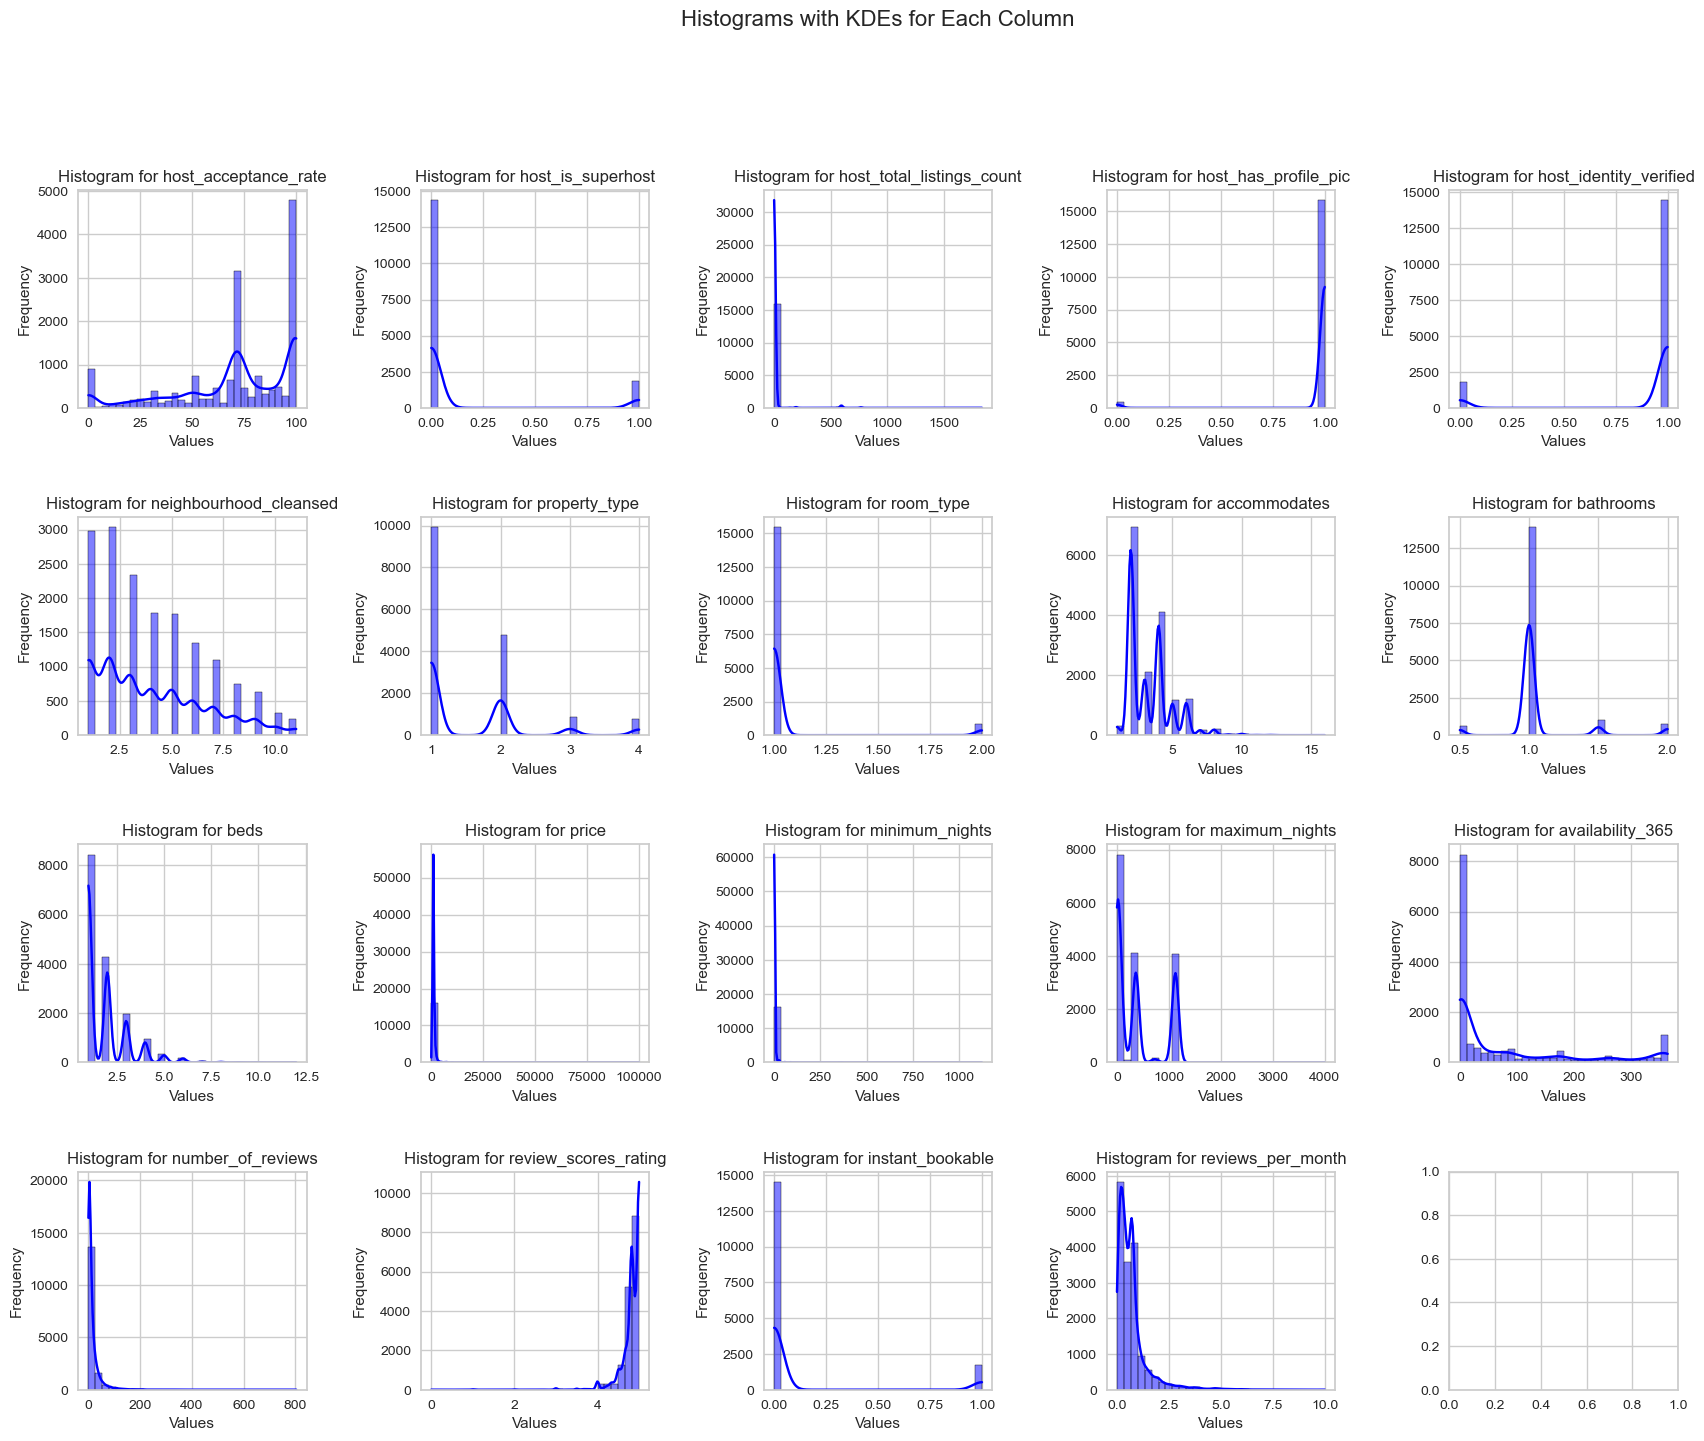

In [42]:
# overview of relevant columns
columns = [ 'host_acceptance_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'instant_bookable',
 'reviews_per_month']

# subplots in grid structure
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
fig.suptitle('Histograms with KDEs for Each Column', y=1.02, fontsize=16)

# loop through each column with index and name 
for i, column in enumerate(columns):
    # flatten 2D to 1D
    ax = axes.flatten()[i]
    # create Histograms
    sns.histplot(cph_listings_df[column], kde=True, bins=30, color='blue', ax=ax)
    ax.set_title(f'Histogram for {column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# adjust to avoid overlap
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.5)

plt.show()

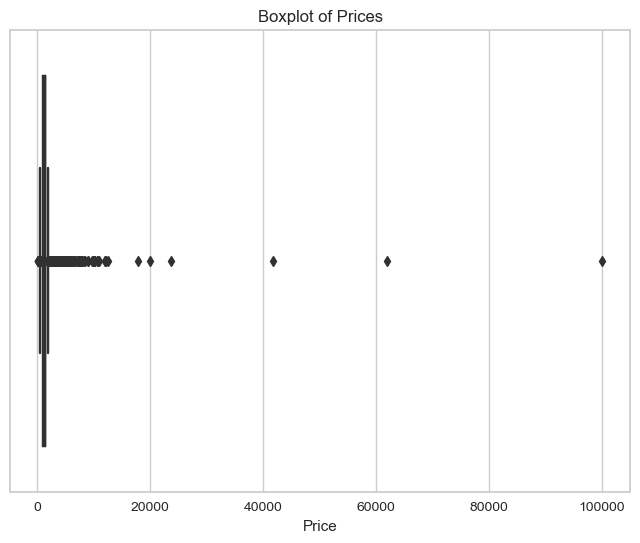

In [43]:
# boxplot for 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=cph_listings_df['price'])

plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

In [44]:
cph_listings_df.shape

(16277, 21)

**Looking at our boxplot it's clear that we have some major outliers.**
**Therefore we'll remove the rows containing outliers.**

In [45]:
# find rows with praices over 15,000 kr. 
outlier_indices = cph_listings_df[cph_listings_df['price'] > 15000].index

# remove rows
cph_listings_df = cph_listings_df.drop(outlier_indices)

# view the rows remove
outlier_indices

Index([389, 4536, 6207, 13399, 16736, 17102], dtype='int64')

In [46]:
# confirm removal
cph_listings_df.shape

(16271, 21)

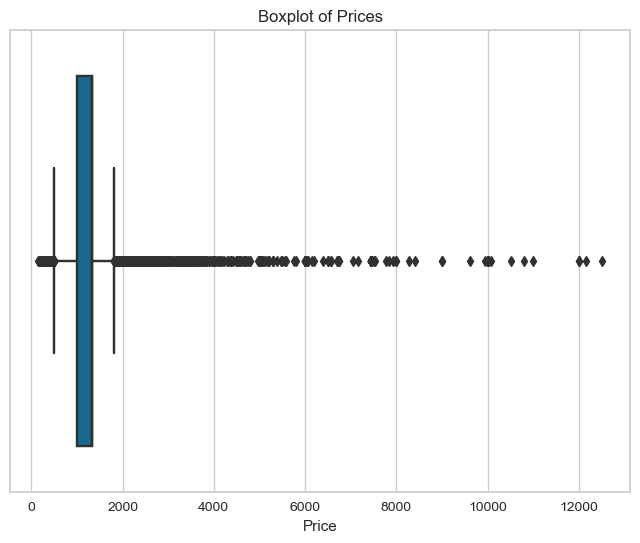

In [47]:
# boxplot for 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=cph_listings_df['price'])

plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

Max Price: 12500.0


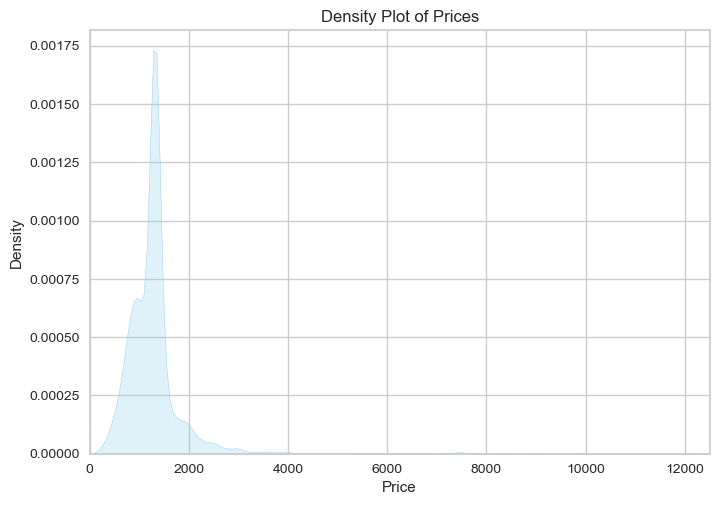

In [48]:
# view max value
max_price = cph_listings_df['price'].max()
print(f'Max Price: {max_price}')


# density plot for prices 
sns.kdeplot(cph_listings_df['price'], fill=True, color='skyblue')
plt.title('Density Plot of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.xlim(0, max_price)
plt.show()


### Correlations related to our problem statement

#### What affects the price on an Airbnb?

- Correlation between 'price' and 'neighbourhood'

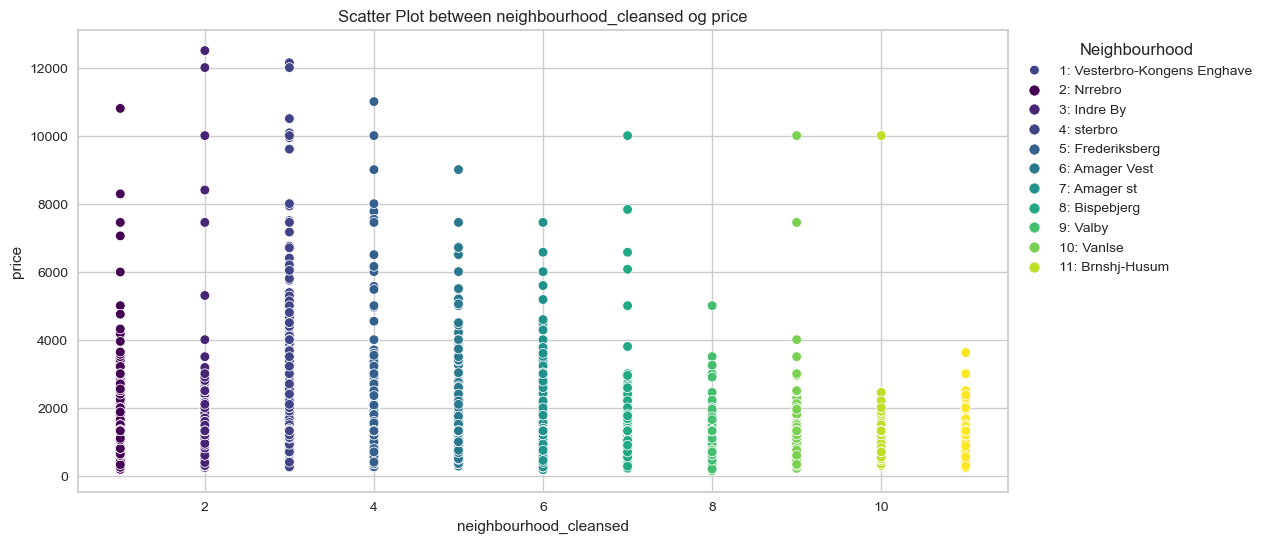

In [49]:
# scatter plot by neighbourhood
plt.figure(figsize=(12, 6))
sns.scatterplot(x='neighbourhood_cleansed', y='price', hue='neighbourhood_cleansed', data=cph_listings_df, palette='viridis', legend='full')
plt.title('Scatter Plot between neighbourhood_cleansed og price')
plt.xlabel('neighbourhood_cleansed')
plt.ylabel('price')

# add legend to describe neightbourhood
legend_labels = {1: 'Vesterbro-Kongens Enghave', 2: 'Nrrebro', 3: 'Indre By', 4: 'sterbro',
                 5: 'Frederiksberg', 6: 'Amager Vest', 7: 'Amager st', 8: 'Bispebjerg',
                 9: 'Valby', 10: 'Vanlse', 11: 'Brnshj-Husum'}
plt.legend(title='Neighbourhood', labels=[f"{key}: {value}" for key, value in legend_labels.items()], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### Does reviews affect your price?

- Correlation between 'price' and 'number_of_reviews'

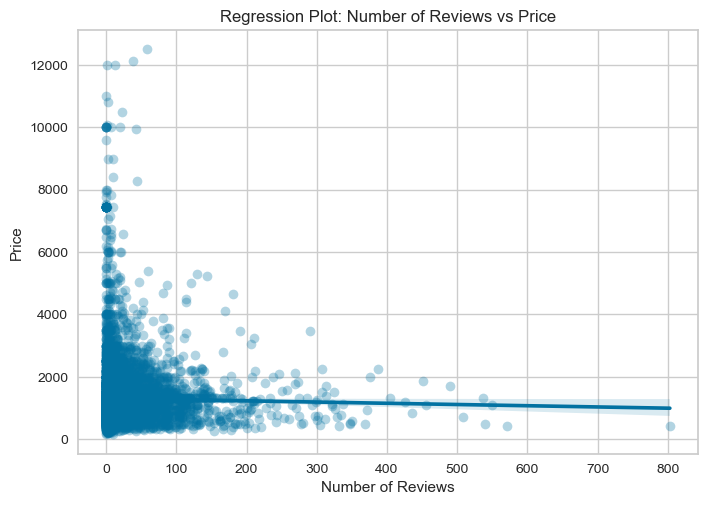

In [50]:
# regression plot for 'price' and 'number_of_reviews'
sns.regplot(x='number_of_reviews', y='price', data=cph_listings_df, scatter_kws={'alpha':0.3})
plt.title('Regression Plot: Number of Reviews vs Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

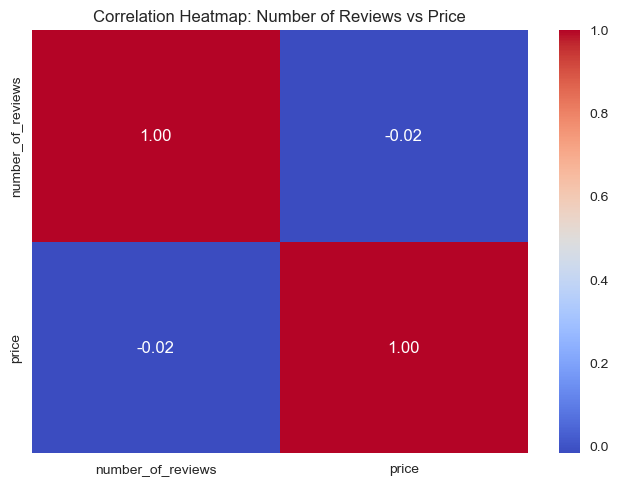

In [51]:
# correlation matrix between 'price' and 'number_of_reviews'
correlation_matrix = cph_listings_df[['number_of_reviews', 'price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Number of Reviews vs Price')
plt.show()

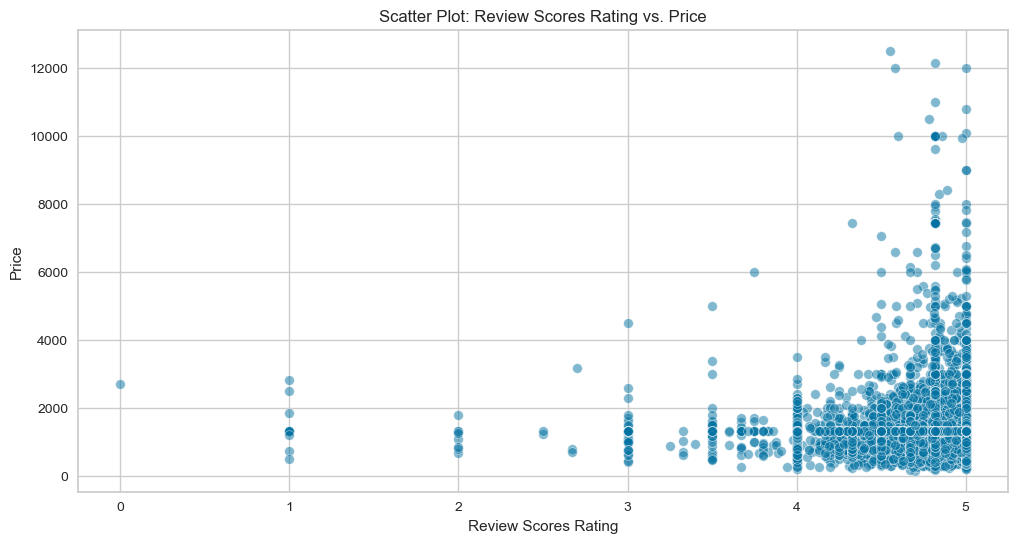

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=cph_listings_df, alpha=0.5)
plt.title('Scatter Plot: Review Scores Rating vs. Price')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()

/var/folders/_k/9qkz5r9j7jsdg286f7bp9h9m0000gn/T/ipykernel_9604/4153138472.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(cph_listings_df['review_scores_rating'], bins=20, kde=False, palette='viridis')


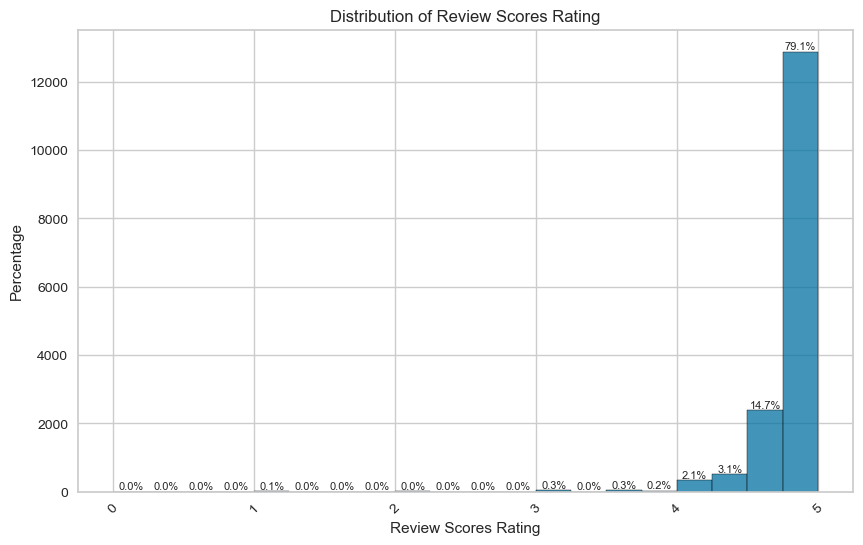

In [53]:
plt.figure(figsize=(10, 6))
histplot = sns.histplot(cph_listings_df['review_scores_rating'], bins=20, kde=False, palette='viridis')

# add percent above each bar
total_samples = len(cph_listings_df)
for p in histplot.patches:
    height = p.get_height()
    percentage = (height / total_samples) * 100
    histplot.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=8)

plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

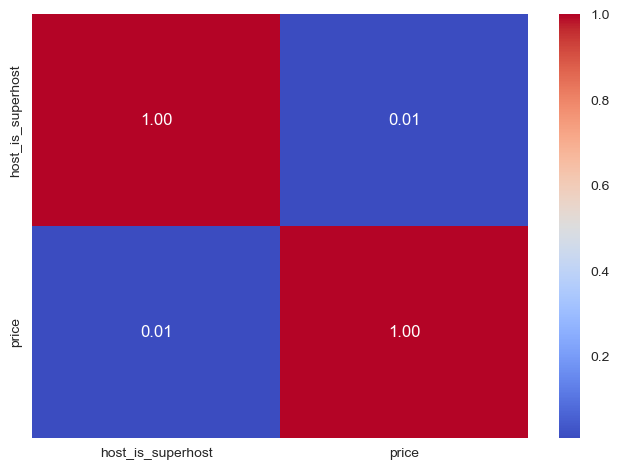

In [54]:
df = cph_listings_df[['host_is_superhost', 'price']]

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

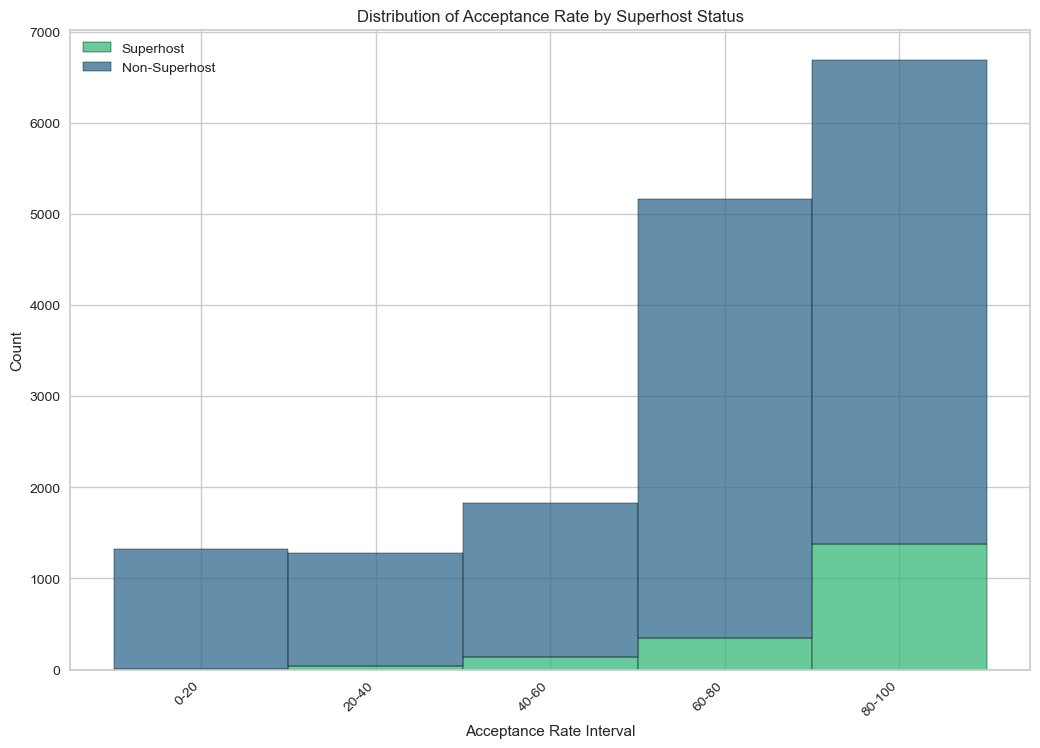

In [55]:
# 5 bins 
acceptance_rate_interval = pd.cut(cph_listings_df['host_acceptance_rate'], bins=5, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

plt.figure(figsize=(12, 8))
sns.histplot(x=acceptance_rate_interval, hue='host_is_superhost', multiple='stack', data=cph_listings_df, palette='viridis', edgecolor='black')

plt.title('Distribution of Acceptance Rate by Superhost Status')
plt.xlabel('Acceptance Rate Interval')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(labels=['Superhost', 'Non-Superhost'])

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

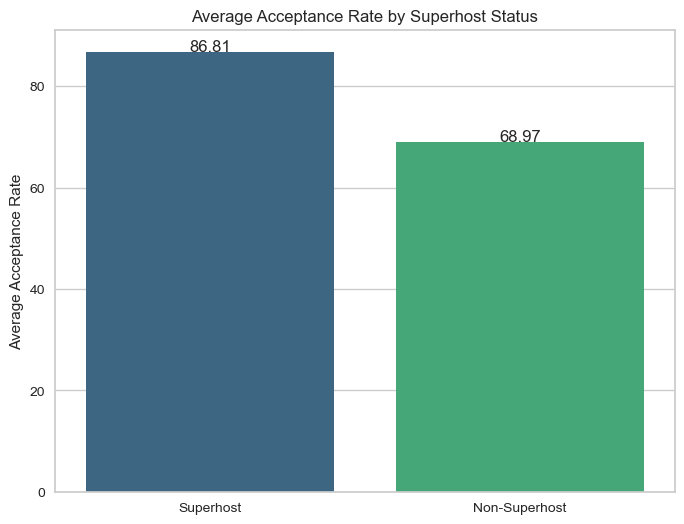

In [56]:
# average acceptance rate for superhosts and non-superhosts
avg_acceptance_rate_superhost = cph_listings_df[cph_listings_df['host_is_superhost'] == 1]['host_acceptance_rate'].mean()
avg_acceptance_rate_non_superhost = cph_listings_df[cph_listings_df['host_is_superhost'] == 0]['host_acceptance_rate'].mean()

# bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Superhost', 'Non-Superhost'], y=[avg_acceptance_rate_superhost, avg_acceptance_rate_non_superhost], palette='viridis')

# add avg. number above the bar
for i, value in enumerate([avg_acceptance_rate_superhost, avg_acceptance_rate_non_superhost]):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center')

plt.title('Average Acceptance Rate by Superhost Status')
plt.ylabel('Average Acceptance Rate')
plt.show()


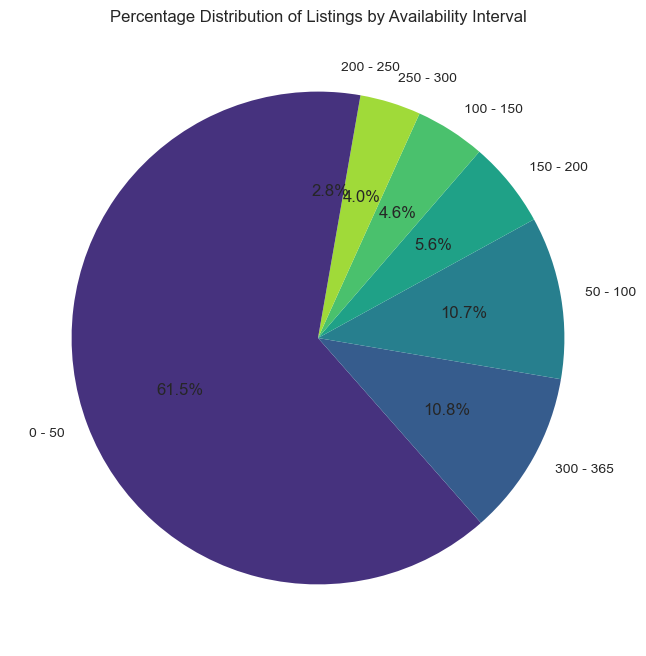

In [57]:
availability_intervals = ['0 - 50', '50 - 100', '100 - 150', '150 - 200', '200 - 250', '250 - 300', '300 - 365']
availability_interval = pd.cut(cph_listings_df['availability_365'], bins=[0, 50, 100, 150, 200, 250, 300, 365], labels=availability_intervals, include_lowest=True)

percentage_distribution = availability_interval.value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)

plt.title('Percentage Distribution of Listings by Availability Interval')
plt.show()

In [58]:
listings_per_neighbourhood = cph_listings_df['neighbourhood_cleansed'].value_counts()
print(listings_per_neighbourhood)

neighbourhood_cleansed
2     3032
1     2984
3     2330
4     1776
5     1770
6     1338
7     1101
8      740
9      634
10     323
11     243
Name: count, dtype: int64


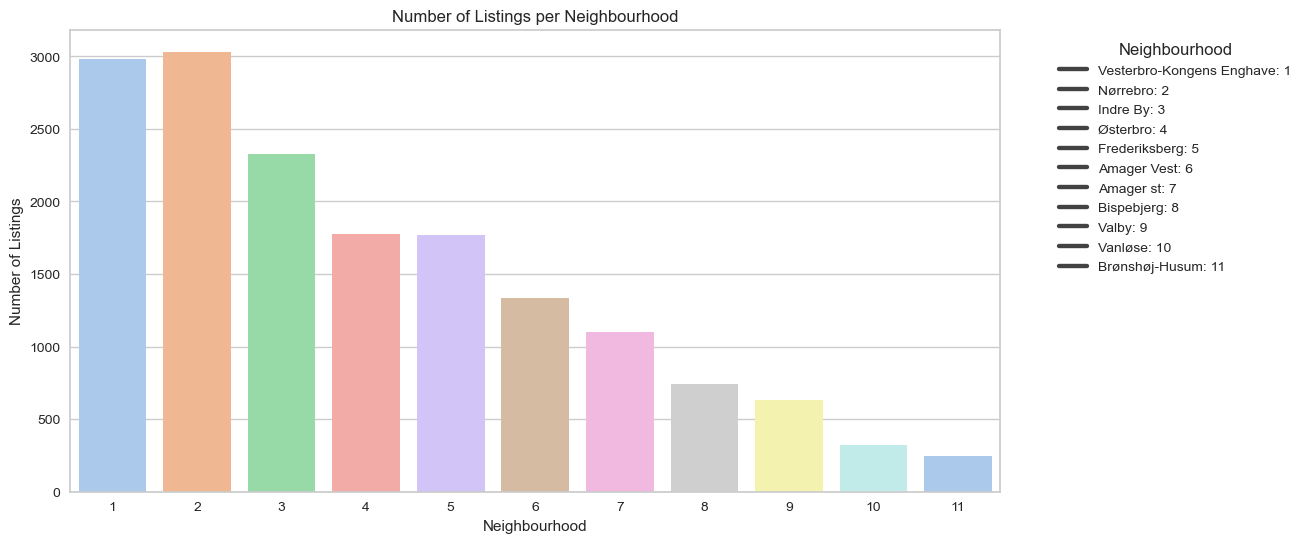

In [101]:
# plot listings per neighbourhood
plt.figure(figsize=(12, 6))
sns.barplot(x=listings_per_neighbourhood.index, y=listings_per_neighbourhood.values, palette='pastel')
plt.title('Number of Listings per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.legend(labels=[f"{num}: {neighbourhood_mapping[num]}" for num in neighbourhood_mapping], title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [60]:
def display_bubble_chart(population_density_data):
    # create bubble plot with data
    bubble_chart = BubbleChart(area=population_density_data['Population Density'],
                               bubble_spacing=0.1)

    # collapse the bubbles to avoid overlap
    bubble_chart.collapse()

    # create a new subplot
    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

    # draw the bubble plot with area names and new colors
    bubble_chart.plot(ax, population_density_data['Area'], ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

    # adjust the axis and display the plot
    ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    ax.set_title('Population density in Copenhagen')

    # display the plot
    plt.show()

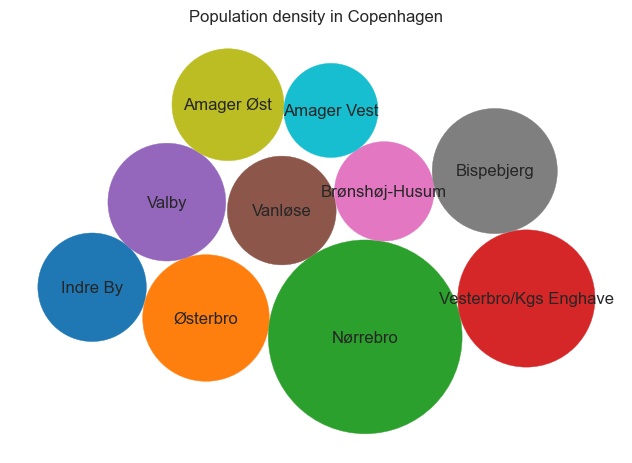

In [61]:
# call the function to display the plot
display_bubble_chart(population_density_data)

### Feature engineering

#### Average price per neighbourhood

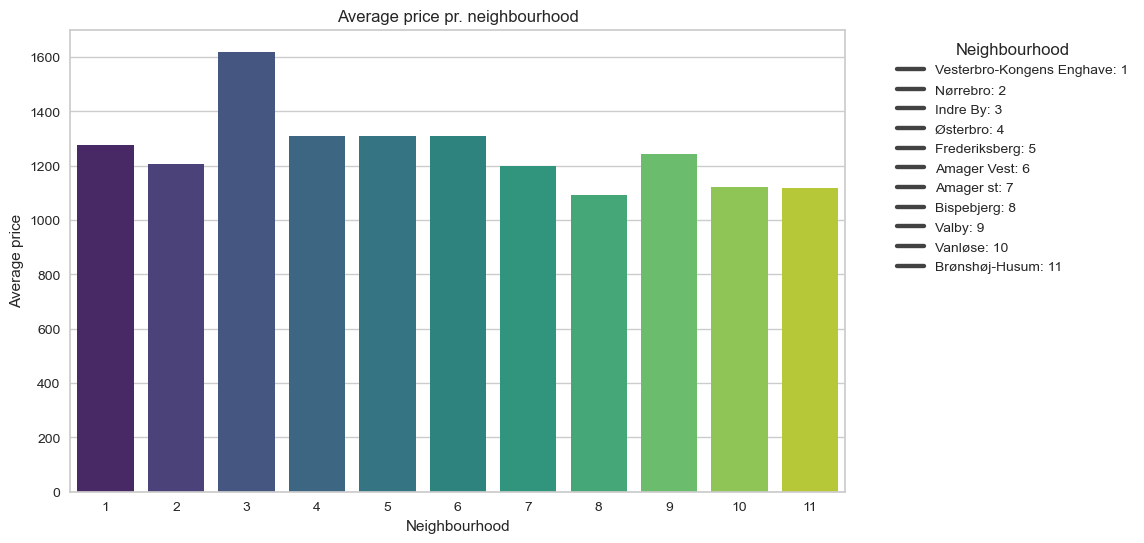

In [62]:
# groupe data by neightbourhood and average price
neighbourhood_prices = cph_listings_df.groupby('neighbourhood_cleansed')['price'].mean()

# create a new column with average price per neighbourhood
cph_listings_df['price_per_neighbourhood'] = cph_listings_df['neighbourhood_cleansed'].map(neighbourhood_prices)

# barplot for average price by neighbourhood
plt.figure(figsize=(10, 6))
sns.barplot(x=neighbourhood_prices.index, y=neighbourhood_prices.values, palette="viridis")

plt.title('Average price pr. neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average price')

# add explaining legends outside plot
plt.legend(labels=[f"{num}: {neighbourhood_mapping[num]}" for num in neighbourhood_mapping], title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [63]:
# view average price for each neighbourhood
print(neighbourhood_prices)

neighbourhood_cleansed
1     1277.845801
2     1205.592331
3     1619.909102
4     1308.120232
5     1311.073042
6     1308.079116
7     1197.425433
8     1092.050544
9     1241.980642
10    1121.287644
11    1117.974239
Name: price, dtype: float64


In [99]:
# create a small df with our newly found data to search for correlations
# excluding 'Frederiksberg' since it is it's own municipal
combined_new_data = {
    'Neighbourhood': [1, 2, 3, 4, 6, 7, 8, 9, 10, 11],
    'Airbnb listings': [2984, 3032, 2330,1776, 1338, 1101, 740, 634, 323, 243],
    'Average price': [1277.845801, 1205.592331, 1619.909102, 1308.120232, 1308.079116, 1197.425433, 1092.050544, 1241.980642, 1121.287644, 1117.974239],
    'Population density': [9692.513569, 19323.730344, 6058.94391, 8247.423099, 4558.852098, 6445.980977, 8055.864767, 7140.411929, 6087.328441 ,5087.539973]
}

combined_df = pd.DataFrame(combined_new_data)
combined_df.head()

,Neighbourhood,Airbnb listings,Average price,Population density
0,1,2984,1277.845801,9692.513569
1,2,3032,1205.592331,19323.730344
2,3,2330,1619.909102,6058.943910
3,4,1776,1308.120232,8247.423099
4,6,1338,1308.079116,4558.852098


**Idéer til spørgsmål:**

- Påvirker befolkningstætheden prisen på Airbnb's? 
- Påvirker befolkningstætheden antallet af Airbnb's?
- Er priserne højere der hvor der er høj befolkningstæthed?

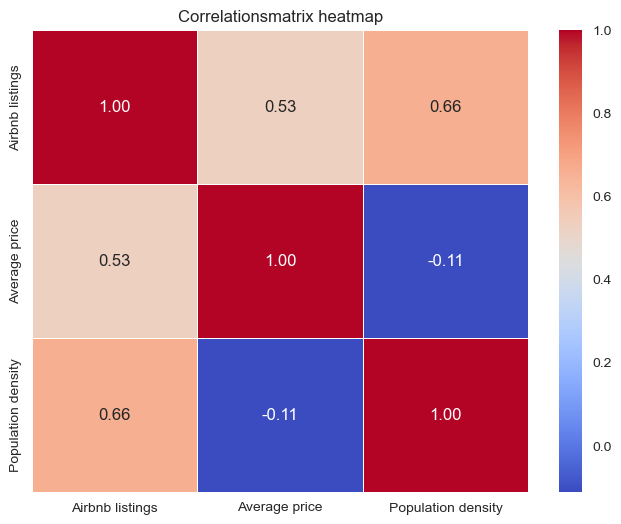

In [100]:
correlation_matrix = combined_df[['Airbnb listings', 'Average price', 'Population density']].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlationsmatrix heatmap')
plt.show()

### Unsupervised machine learning by K-Means algorithm

**In our efforts to address our problem statement, we'll use clustering to try to explore and identify patterns and groups in our data.**

**Note:**
Standardizing features is important to prevent certain features from exerting disproportionate influence on the final results due to differences in their units and data ranges.


#### Data preparation 

In [66]:
scaler = StandardScaler()

# standardize features
feature_data = cph_listings_df[['price', 'number_of_reviews']]
standardized_data = scaler.fit_transform(feature_data)

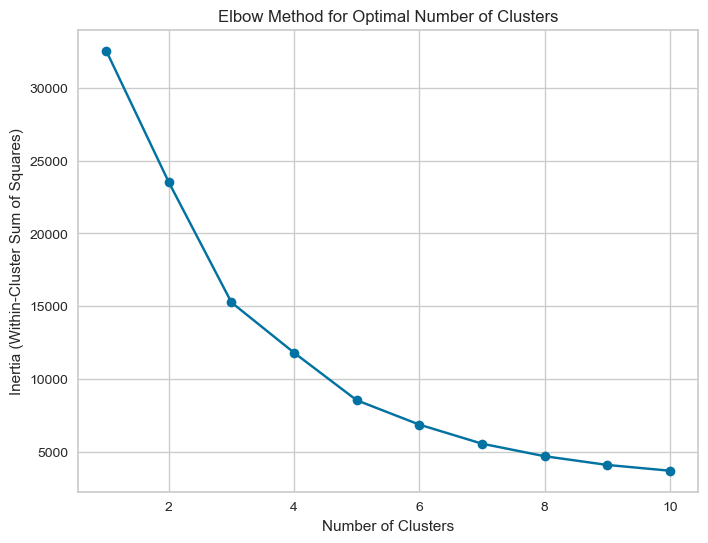

In [67]:
# cluster range
num_clusters = range(1, 11)

# list to store inertia 
inertia_values = []

# loop K-means for different amounts of clusters and save the inertia
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(standardized_data)
    inertia_values.append(kmeans.inertia_)

# plot elbow
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

In [68]:
# set number of clusters 
num_clusters = 6

Try to find a decent starting point for our centroids

In [69]:
# create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [70]:
# train KMeans model
kmeans.fit(standardized_data)

KMeans(n_clusters=6, n_init=20)

In [71]:
# explore centroids
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 0.11464085, -0.21650151],
       [-0.13664894,  1.82880449],
       [ 9.17057809, -0.32807825],
       [-0.18534082,  8.02843472],
       [-0.6620391 , -0.21999645],
       [ 2.19934268, -0.04781013]])

**Explore centroids explanation:**

Each row represents a cluster.
- First value is the average price point in this cluster.
- Second values is the average number_of_reviews point in this cluster.

In [72]:
# tries to predict based on exsisting data
cluster_predictions = kmeans.predict(standardized_data)
cluster_predictions

array([0, 4, 4, ..., 0, 0, 0], dtype=int32)

**Output explenation:**
First value goes to cluster a, second values goes to cluster b, and so on.

#### Visualize clusters

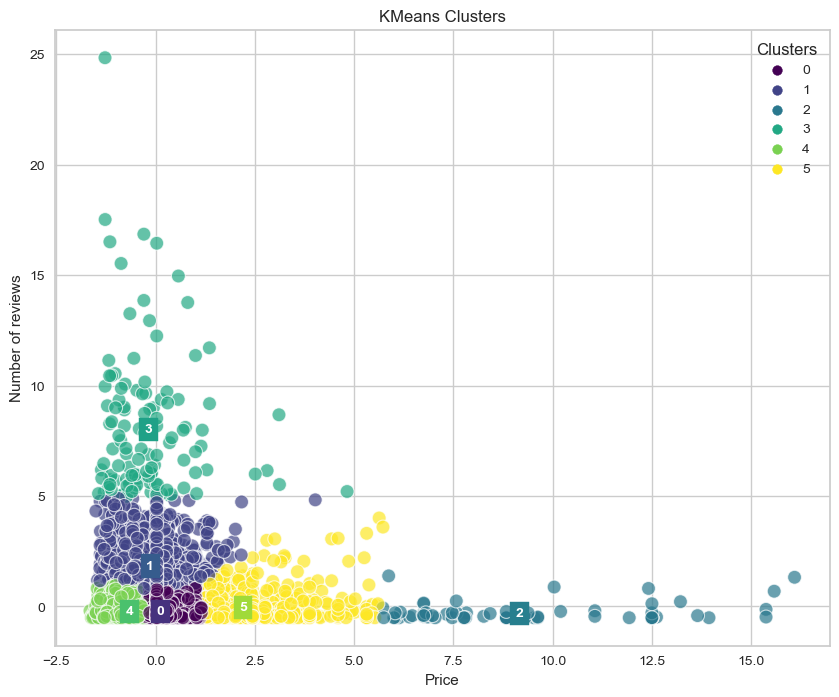

In [73]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=standardized_data[:, 0],
                y=standardized_data[:, 1],
                # s = size, alpha = see through
                hue=cluster_predictions, palette='viridis', s=100, alpha=0.7)

# add labels centered on cluster means
for label in range(num_clusters):
    cluster_mean = standardized_data[cluster_predictions == label].mean(axis=0)
    plt.text(cluster_mean[0], cluster_mean[1], str(label), 
             size=10, weight='bold', color='white', backgroundcolor=sns.color_palette('viridis')[label],
             horizontalalignment='center', verticalalignment='center')

plt.title('KMeans Clusters')
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.legend(title='Clusters')
plt.show()

#### Validate the model

In [74]:
k = 9
model = KMeans(n_clusters=k, init='k-means++', n_init=20, random_state=42)
cluster_labels = model.fit_predict(standardized_data)

In [75]:
# calculate the silhouette score
score = silhouette_score(standardized_data, cluster_labels, metric='euclidean')
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.486


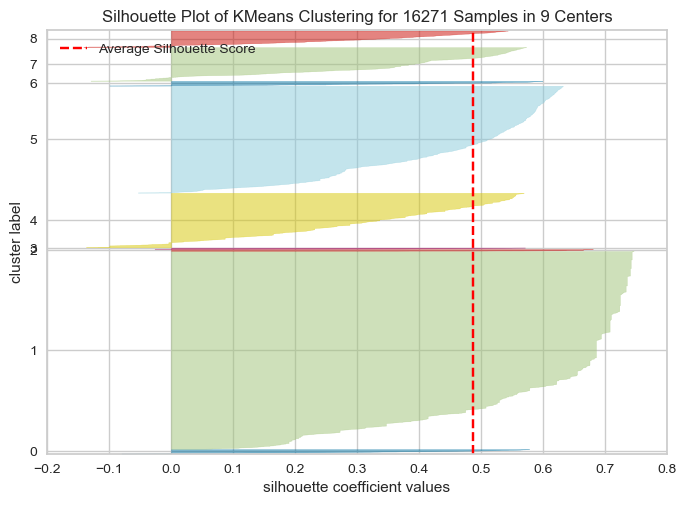

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 16271 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
# visualize the silhouette scores
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(standardized_data)
visualizer.show()

**Note:**
- Any score above 0.5 is relatively good

#### Try new data on the model

In [77]:
# predict cluster of new data
new_data = np.array([[5.8, 25], [60.0, 84.0], [300.0, 300.0]])

# df with the same feature names that match the model's features
new_data_df = pd.DataFrame(new_data, columns=['price', 'number_of_reviews'])

# scale data the same way as before
new_data_standardized = scaler.transform(new_data_df)

# try to predict clusters
predicted_cluster = kmeans.predict(new_data_standardized)
print(predicted_cluster)

[4 1 3]


In [78]:
new_data = np.array([[300.0, 300.0]])  
new_data_df = pd.DataFrame(new_data, columns=['price', 'number_of_reviews'])
new_data_standardized = scaler.transform(new_data_df)
predicted_cluster = kmeans.predict(new_data_standardized)

# check if clusters = 3 is true
test = predicted_cluster == 3
print(test)

[ True]


TODO: 

Store the model? 
How does this new knowledge relate to our problem statement??